In [50]:
%run common.ipynb


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: C:\Users\natha\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [20]:
# Parameters
input_cols = ['shape', 'profile_entrance', 'profile_exit', 'rising_entrance', 'rising_exit', 'shards', 'fethering', 'entrance_mounding', 'center_mounding', 'exit_mounding']
result_col = 'result'
train_dataset_file = 'DATA/Train/blade_prediction.xlsx'
test_dataset_file = 'DATA/Validation/blade_prediction_validation.xlsx'

In [3]:
display_input_data(
    train_dataset_file,
    input_cols
)

,shape_E,shape_indeterminate,profile_entrance_V,profile_exit_V,rising_entrance_bilateral,rising_entrance_single,rising_exit_bilateral,rising_exit_single,shards_present,fethering_present,entrance_mounding_bilateral,entrance_mounding_single,center_mounding_bilateral,center_mounding_single,exit_mounding_bilateral,exit_mounding_single
0,0,1,1,1,0,1,0,1,0,0,0,1,0,0,0,1
1,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1
2,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0
3,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0
4,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1
276,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
277,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
278,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0


In [5]:
check_input_data_indices(train_dataset_file, test_dataset_file, input_cols)

Datasets are compatible


In [6]:
model = train_model(
    train_dataset_file,
    input_cols,
    result_col
)
model

LogisticRegression(random_state=0, solver='liblinear')

In [7]:
evaluate_model(
    model,
    test_dataset_file,
    input_cols,
    result_col
)

0.7611940298507462

In [28]:
import itertools

all_combinations = []
for l in range(2, len(input_cols) + 1):
#for l in range(2, 7):
    all_combinations.append(list(itertools.combinations(input_cols, l)))

scores = []
cols_combs = []
for input_cols_comb_of_len in all_combinations:
    print('Testing combinations of length ' + str(len(input_cols_comb_of_len[0])))
    for input_cols_comb in input_cols_comb_of_len:
        #print(input_cols_comb)
        model = train_model(
            train_dataset_file,
            list(input_cols_comb),
            result_col
        )
        score = evaluate_model(
            model,
            test_dataset_file,
            list(input_cols_comb),
            result_col
        )
        #print(score)
        scores.append(score)
        cols_combs.append(input_cols_comb)

Testing combinations of length 2
Testing combinations of length 3
Testing combinations of length 4
Testing combinations of length 5
Testing combinations of length 6
Testing combinations of length 7
Testing combinations of length 8
Testing combinations of length 9
Testing combinations of length 10


In [29]:
max_score = max(scores)
max_score_idx = scores.index(max_score)
max_score_cols = cols_combs[max_score_idx]

min_score = min(scores)
min_score_idx = scores.index(min_score)
min_score_cols = cols_combs[min_score_idx]

print('Max score: ' + str(max_score))
print('Best columns comb: ' + str(max_score_cols))
print('Min score: ' + str(min_score))
print('Worse columns comb: ' + str(min_score_cols))


Max score: 0.8805970149253731
Best columns comb: ('shape', 'profile_exit', 'rising_entrance', 'shards', 'exit_mounding')
Min score: 0.6865671641791045
Worse columns comb: ('fethering', 'exit_mounding')


<AxesSubplot:>

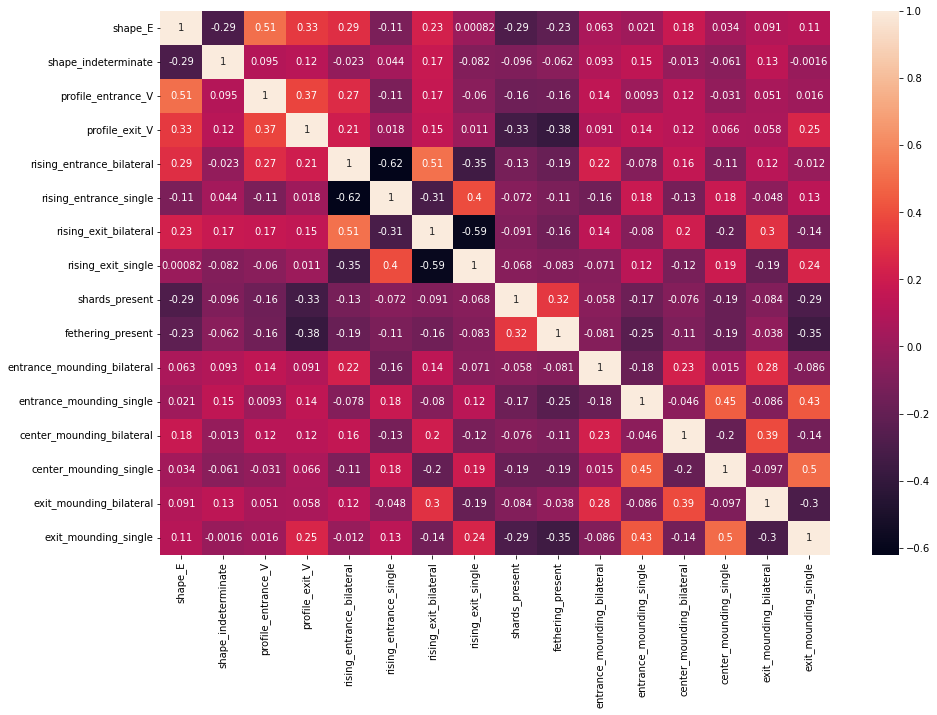

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

x = prepare_dataset(train_dataset_file, input_cols)

plt.figure(figsize=(15,10))
sns.heatmap(x.corr(method='pearson'), annot=True)